In [68]:
import torch
import torchviz
import os
import torch.nn as nn
import pandas as pd
import numpy as np      
from sklearn.model_selection import train_test_split
import tensorflow as tf
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader, TensorDataset, ConcatDataset
from torch.utils.data import WeightedRandomSampler, RandomSampler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score, precision_recall_curve, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import KFold, StratifiedKFold

In [69]:
# import dataset
df = pd.read_csv("../3 - Cleaning & Transforming Data/2 cleaned_dataset_MERGED_DRUG(Mogran)_ALLELESEQ.csv", index_col = None)

if(df.isna().any().sum()) != 0:
    raise Exception('There are still missing values in the dataset!')

In [70]:
# check ของแปลกที่หลุดเข้ามา
for x in df.columns:
    print(x)

Drug
Allele
ADR_MPexanthema
ADR_SJS
ADR_TEN
ADR
Cohort ethnicity_Black
Cohort ethnicity_Caucasian
Cohort ethnicity_Diverse
Cohort ethnicity_Mongol
Cohort ethnicity
No_ADR
Yes_ADR
0
1
2
3
4
11
20
23
30
74
80
86
122
123
130
140
151
162
175
191
204
207
245
248
264
294
297
300
314
315
319
323
333
336
338
350
352
366
371
378
381
389
405
409
426
428
435
448
456
461
469
470
485
486
501
502
511
527
530
535
547
554
556
561
588
600
609
623
624
631
637
650
656
675
679
694
713
715
725
739
745
750
751
764
770
772
780
787
794
798
806
807
833
834
843
849
872
875
882
883
884
888
926
935
952
974
984
987
990
993
1011
1017
1019
1028
1039
1043
1044
1055
1057
1060
1066
1070
1077
1088
1097
1098
1099
1102
1105
1114
1120
1130
1137
1138
1142
1145
1148
1152
1153
1155
1164
1168
1171
1182
1184
1199
1212
1236
1242
1267
1269
1270
1292
1295
1312
1313
1318
1325
1340
1347
1351
1357
1380
1389
1391
1398
1426
1428
1434
1446
1448
1449
1452
1457
1459
1464
1476
1480
1498
1528
1535
1542
1544
1564
1578
1585
1589
1602
1607
164

In [71]:
df['ADR'].value_counts()

SJS            5805
TEN            3738
MPexanthema    3530
Name: ADR, dtype: int64

In [72]:
# Drop unnecessary columns
df_stratify = pd.DataFrame()
df['ADR'] = df['ADR'].replace({'SJS': 0, 'TEN': 1, 'MPexanthema':2})#,'MPeruption':3})
#df = df[df['ADR'].isin([0,1])] #ลบ MP ออก
#df_stratify['Yes_ADR'] = df['ADR'].copy()
#df_stratify = df_stratify.rename(columns={'Yes_ADR':'ADR'})
df.drop(columns=['No_ADR','ADR','ADR_MPexanthema','ADR_SJS','ADR_TEN','Cohort ethnicity','Allele','Drug'], inplace=True) #'MPeruption' removed

In [73]:
# Select output columns and drop unnecessary columns
df_output = df['Yes_ADR'].copy()
df.drop(columns = ['Yes_ADR'], inplace = True)
df_input = df.copy()
# Check input dtypes
df_input.dtypes.value_counts()

int64    350
dtype: int64

In [74]:
# check ของแปลกที่หลุดเข้ามา
df_output

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
13068    0.0
13069    0.0
13070    0.0
13071    0.0
13072    0.0
Name: Yes_ADR, Length: 13073, dtype: float64

In [75]:
# check ของแปลกที่หลุดเข้ามา
for x in df_input.columns:
    print(x)

Cohort ethnicity_Black
Cohort ethnicity_Caucasian
Cohort ethnicity_Diverse
Cohort ethnicity_Mongol
0
1
2
3
4
11
20
23
30
74
80
86
122
123
130
140
151
162
175
191
204
207
245
248
264
294
297
300
314
315
319
323
333
336
338
350
352
366
371
378
381
389
405
409
426
428
435
448
456
461
469
470
485
486
501
502
511
527
530
535
547
554
556
561
588
600
609
623
624
631
637
650
656
675
679
694
713
715
725
739
745
750
751
764
770
772
780
787
794
798
806
807
833
834
843
849
872
875
882
883
884
888
926
935
952
974
984
987
990
993
1011
1017
1019
1028
1039
1043
1044
1055
1057
1060
1066
1070
1077
1088
1097
1098
1099
1102
1105
1114
1120
1130
1137
1138
1142
1145
1148
1152
1153
1155
1164
1168
1171
1182
1184
1199
1212
1236
1242
1267
1269
1270
1292
1295
1312
1313
1318
1325
1340
1347
1351
1357
1380
1389
1391
1398
1426
1428
1434
1446
1448
1449
1452
1457
1459
1464
1476
1480
1498
1528
1535
1542
1544
1564
1578
1585
1589
1602
1607
1646
1647
1657
1675
1683
1708
1722
1738
1739
1742
1750
1778
1786
1803
1804
1816
182

In [76]:
df

,Cohort ethnicity_Black,Cohort ethnicity_Caucasian,Cohort ethnicity_Diverse,Cohort ethnicity_Mongol,0,1,2,3,4,11,...,p2-39-W,p2-43-H,p2-43-Y,p2-48-E,p2-48-K,p2-52-D,p2-52-E,p2-52-K,p2-53-K,p2-53-T
0,0,0,1,0,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13068,0,0,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,1
13069,0,0,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,1
13070,0,0,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,1
13071,0,0,0,1,0,0,0,0,0,0,...,1,1,0,1,0,0,1,0,0,1


In [77]:
# # Change all input dtypes to float64
# df_input = df_input.astype('float64')
# df_input.dtypes.value_counts()

In [78]:
# Convert to numpy array
np_input = df_input.to_numpy()
np_output = df_output.to_numpy()
np_stratify = df_stratify.to_numpy()

In [79]:
pd.DataFrame(np_stratify).value_counts()

Series([], dtype: int64)

In [80]:
np_input    

array([[0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [81]:
# Function to check dataloader classes distribution
def get_dataloader_distribution(*args):
    graph_no = len(args)
    fig, ax = plt.subplots(graph_no,1)
    
    for index, dataloader in enumerate(args):
        batch_no = [x+1 for x in range(len(dataloader))]
        class_0_count = []
        class_1_count = []
        batch_count = []

        for i, (data,target) in enumerate(dataloader):
            tocount = pd.DataFrame(target.numpy()).value_counts()
            batch_count.append(i+1)
            class_0_count.append(tocount[0.0])
            class_1_count.append(tocount[1.0])

        X_axis = np.arange(len(batch_count))

        
        fig.set_figwidth(15)
        fig.set_figheight(10)
        ax[index].set_xlabel="Batch Number"
        ax[index].set_ylabel="No. Datapoints"
        ax[index].bar(X_axis,class_0_count,width=(1/3) ,label = "NoADR",color='green',alpha=0.5)
        ax[index].bar(X_axis+(1/3),class_1_count,width=(1/3), label = 'ADR',color='red',alpha=0.5)
        #ax.set_xticks(X_axis+width)
        ax[index].legend()

        ax[index].set_title(f"{dataloader} Data Distribution")
    fig.show()

In [82]:
# Define the model hyperparameters
classes = 1
batch_size = 128 
LEARNING_RATE = 2e-5 
DROPOUT_RATE = 0.2
L2lambda = 1e-2
EPOCHS = 1000
DIR = os.getcwd()
dirname = "optuna_study6(wide_final)" 
#train_loader, test_loader = get_dataloaders(batch_size)
loss_fn = nn.BCELoss() 
#get_dataloader_distribution(train_loader,test_loader)

In [83]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [84]:
model2 = torch.jit.load('../4 - Training & Testing/final/final').to('cuda').to(device)
model2.eval()

# Create Weight for Sampler
weight = (1/pd.DataFrame(np_output).value_counts()).tolist()
sample_weights = np.array([weight[int(t)] for t in np_output])

# Create Sampler
sampler = WeightedRandomSampler(weights=sample_weights,num_samples=len(sample_weights), replacement=True)
#train_sampler = RandomSampler(np_fold_train_output) #RandomSampler จะทำให้เห็นว่า class มัน imbalance ยังไง

# Create Dataset and Dataloader
train_dataset = TensorDataset(torch.from_numpy(np_input).float(), torch.from_numpy(np_output).float())
#test_dataset = TensorDataset(torch.from_numpy(np_fold_test_input).float(), torch.from_numpy(np_fold_test_output).float())
train_loader = DataLoader(train_dataset, batch_size=np_input.shape[0])# , sampler=sampler)

model2

RecursiveScriptModule(
  original_name=Network
  (layers): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(original_name=Linear)
    (1): RecursiveScriptModule(original_name=ReLU)
    (2): RecursiveScriptModule(original_name=Dropout)
    (3): RecursiveScriptModule(original_name=Linear)
    (4): RecursiveScriptModule(original_name=ReLU)
    (5): RecursiveScriptModule(original_name=Dropout)
    (6): RecursiveScriptModule(original_name=Linear)
    (7): RecursiveScriptModule(original_name=ReLU)
    (8): RecursiveScriptModule(original_name=Dropout)
    (9): RecursiveScriptModule(original_name=Linear)
    (10): RecursiveScriptModule(original_name=ReLU)
    (11): RecursiveScriptModule(original_name=Dropout)
    (12): RecursiveScriptModule(original_name=Linear)
    (13): RecursiveScriptModule(original_name=Sigmoid)
  )
)

## ตรวจสอบความถูกต้อง (ไม่ใช้ Sampler, และใช้ Batch_size = row)

In [85]:
pd.DataFrame(train_dataset.tensors[1].numpy()).value_counts()

0.0    8438
1.0    4635
dtype: int64

In [86]:
for x in train_loader:
    print(pd.DataFrame(x[1].numpy()).value_counts())

0.0    8438
1.0    4635
dtype: int64


## Calculate per class

In [225]:
# import dataset
df2 = pd.read_csv("../3 - Cleaning & Transforming Data/2 cleaned_dataset_MERGED_DRUG(Mogran)_ALLELESEQ.csv", index_col = None)

if(df2.isna().any().sum()) != 0:
    raise Exception('There are still missing values in the dataset!')

df2.sort_values(by=['ADR'],inplace = True)
df2.reset_index(drop=True,inplace=True)
MPexanthema_index = df2[df2['ADR'] == 'MPexanthema'].index.tolist()
TEN_index = df2[df2['ADR'] == 'TEN'].index.tolist()
SJS_index = df2[df2['ADR'] == 'SJS'].index.tolist()

df2 = df2.iloc[:,6:]
df2_target = df2['Yes_ADR'].copy()
df2.drop(columns=['No_ADR','Yes_ADR','Cohort ethnicity'], inplace=True)


accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

In [226]:
from sklearn.metrics import f1_score, recall_score, precision_score

input = df2.copy()
input = input.to_numpy()
input = torch.tensor(input).float().to(device)
target = df2_target.to_numpy()
target = torch.tensor(df2_target).float().to(device)
output = model2(input)

corrected = torch.round(output[TEN_index].flatten().detach().cpu()) == target[TEN_index].detach().cpu()
accuracy = torch.sum(corrected).item()/len(corrected)

output_rounded = torch.round(output).detach().cpu()
target = target.detach().cpu()

precision = precision_score(output_rounded[TEN_index],target[TEN_index], zero_division=0)
f1_score = f1_score(output_rounded[TEN_index], target[TEN_index], zero_division=0)
recall_score = recall_score(output_rounded[TEN_index], target[TEN_index], zero_division=0)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1_score}")
print(f"Recall Score: {recall_score}")

accuracy_list.append(accuracy*100)
precision_list.append(precision*100)
recall_list.append(recall_score*100)
f1_list.append(f1_score*100)

Accuracy: 0.7413055109684323
Precision: 0.6606367583212736
F1 Score: 0.6537773003938419
Recall Score: 0.6470588235294118


In [227]:
from sklearn.metrics import f1_score, recall_score, precision_score

input = df2.copy()
input = input.to_numpy()
input = torch.tensor(input).float().to(device)
target = df2_target.to_numpy()
target = torch.tensor(df2_target).float().to(device)
output = model2(input)

corrected = torch.round(output[SJS_index].flatten().detach().cpu()) == target[SJS_index].detach().cpu()
accuracy = torch.sum(corrected).item()/len(corrected)

output_rounded = torch.round(output).detach().cpu()
target = target.detach().cpu()

precision = precision_score(output_rounded[SJS_index],target[SJS_index], zero_division=0)
f1_score = f1_score(output_rounded[SJS_index], target[SJS_index], zero_division=0)
recall_score = recall_score(output_rounded[SJS_index], target[SJS_index], zero_division=0)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1_score}")
print(f"Recall Score: {recall_score}")

accuracy_list.append(accuracy*100)
precision_list.append(precision*100)
recall_list.append(recall_score*100)
f1_list.append(f1_score*100)

Accuracy: 0.6997416020671835
Precision: 0.6824552924117931
F1 Score: 0.618349025618568
Recall Score: 0.5652522017614091


In [228]:
from sklearn.metrics import f1_score, recall_score, precision_score

input = df2.copy()
input = input.to_numpy()
input = torch.tensor(input).float().to(device)
target = df2_target.to_numpy()
target = torch.tensor(df2_target).float().to(device)
output = model2(input)

corrected = torch.round(output[MPexanthema_index].flatten().detach().cpu()) == target[MPexanthema_index].detach().cpu()
accuracy = torch.sum(corrected).item()/len(corrected)

output_rounded = torch.round(output).detach().cpu()
target = target.detach().cpu()

precision = precision_score(output_rounded[MPexanthema_index],target[MPexanthema_index], zero_division=0)
f1_score = f1_score(output_rounded[MPexanthema_index], target[MPexanthema_index], zero_division=0)
recall_score = recall_score(output_rounded[MPexanthema_index], target[MPexanthema_index], zero_division=0)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1_score}")
print(f"Recall Score: {recall_score}")

accuracy_list.append(accuracy*100)
precision_list.append(precision*100)
recall_list.append(recall_score*100)
f1_list.append(f1_score*100)

Accuracy: 0.6487252124645893
Precision: 0.5557432432432432
F1 Score: 0.514866979655712
Recall Score: 0.47959183673469385


In [229]:
from sklearn.metrics import f1_score, recall_score, precision_score

input = df2.copy()
input = input.to_numpy()
input = torch.tensor(input).float().to(device)
target = df2_target.to_numpy()
target = torch.tensor(df2_target).float().to(device)
output = model2(input)

corrected = torch.round(output.flatten().detach().cpu()) == target.detach().cpu()
accuracy = torch.sum(corrected).item()/len(corrected)

output_rounded = torch.round(output).detach().cpu()
target = target.detach().cpu()

precision = precision_score(output_rounded,target, zero_division=0)
f1_score = f1_score(output_rounded, target, zero_division=0)
recall_score = recall_score(output_rounded, target, zero_division=0)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1_score}")
print(f"Recall Score: {recall_score}")

accuracy_list.append(accuracy*100)
precision_list.append(precision*100)
recall_list.append(recall_score*100)
f1_list.append(f1_score*100)

Accuracy: 0.6978505316300773
Precision: 0.6435814455231931
F1 Score: 0.6016538926986688
Recall Score: 0.5648551410717667


In [230]:
print(f"Accuracy: {accuracy_list}")
print(f"Precision: {precision_list}")

print(f"Recall Score: {recall_list}")
print(f"F1 Score: {f1_list}")

Accuracy: [74.13055109684323, 69.97416020671835, 64.87252124645893, 69.78505316300773]
Precision: [66.06367583212736, 68.24552924117931, 55.57432432432432, 64.3581445523193]
Recall Score: [64.70588235294117, 56.52522017614091, 47.95918367346938, 56.48551410717667]
F1 Score: [65.37773003938419, 61.834902561856794, 51.4866979655712, 60.16538926986688]


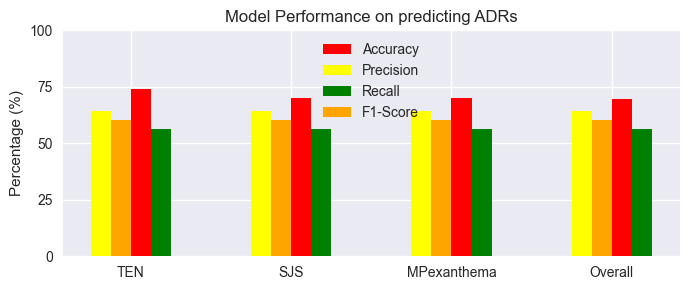

In [212]:
fig,ax = plt.subplots(figsize=(7,3))
X_axis = np.arange(1,len(accuracy_list)+1,1)
X_axis_label = ['TEN','SJS','MPexanthema','Overall']
ax.bar(X_axis+(1/8)-(1/16),accuracy_list, color='red',label = "Accuracy",width=1/8)
ax.bar(X_axis-(2/8)+(1/16),precision_list, color='yellow',label = "Precision",width=1/8)
ax.bar(X_axis+(2/8)-(1/16),recall_list, color='green',label = "Recall",width=1/8)
ax.bar(X_axis-(1/8)+(1/16),f1_list, color='orange',label = "F1-Score",width=1/8)

ax.set_xticks(X_axis, X_axis_label)
#ax.set_ybound(0,1)
ax.legend()
ax.set_yticks([0,25,50,75,100])
ax.set_title("Model Performance on predicting ADRs")
ax.set_ylabel("Percentage (%)")
plt.style.use('seaborn-pastel')
# plt.show()
plt.tight_layout()

In [52]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [ ]:
data = data.to(device)
target = target.to(device)
output = model2(data)
output_notrounded_tensor = output.to(device)
output_notrounded_numpy = output.detach().cpu().numpy()
output = torch.round(output).flatten()
output = output.detach().cpu().numpy()
target = target.detach().cpu().numpy()

tensor([[0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 1.,  ..., 0., 0., 1.]], device='cuda:0')

## นำผ่านข้อมูล

In [ ]:
for batchidx, (data,target) in enumerate(train_loader):
    data = data.to(device)
    target = target.to(device)
    output = model2(data)
    output_notrounded_tensor = output.to(device)
    output_notrounded_numpy = output.detach().cpu().numpy()
    output = torch.round(output).flatten()
    output = output.detach().cpu().numpy()
    target = target.detach().cpu().numpy()
    #data = data.detach().cpu().numpy()

In [ ]:
# correct = (output == target).sum().item()
# acc = correct / len(target)
# precision = precision_score(output, target, zero_division=0)
# f1_score = f1_score(output, target, zero_division=0)
# recall_score = recall_score(output, target, zero_division=0)
# print(f"Accuracy: {acc}")
# print(f"Precision: {precision}")
# print(f"F1 Score: {f1_score}")
# print(f"Recall Score: {recall_score}")

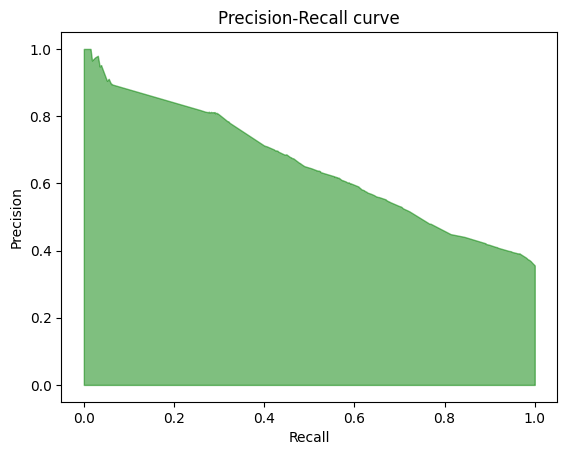

In [ ]:
precision, recall, threshold = precision_recall_curve(target, output_notrounded_tensor.flatten().detach().cpu().numpy(),pos_label=1)
F1Score =  (2*precision*recall) / (precision + recall)
max_F1Score = np.argmax(F1Score)

plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title(f"Precision-Recall curve")
plt.fill_between(recall, precision, alpha=0.5, color='g')
#plt.scatter(recall[max_F1Score], precision[max_F1Score], marker='o', color='red', label='best')

In [ ]:
max_f1_thresh = threshold[max_F1Score]
max_f1_thresh

0.469845

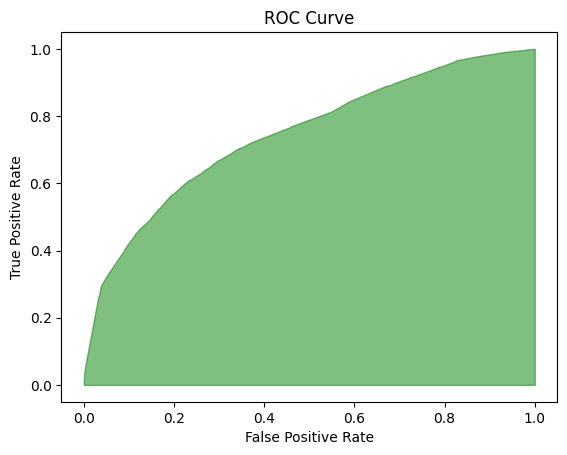

In [ ]:
ns_fpr, ns_tpr, _ = roc_curve(target, output_notrounded_tensor.flatten().detach().cpu().numpy())
pyplot.fill_between(ns_fpr, ns_tpr, alpha=0.5, color='g')
pyplot.title("ROC Curve")
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()

In [ ]:
from sklearn.metrics import auc
auc_score = auc(recall, precision)
auc_score

0.6560166866786907

In [ ]:
# calculate AUC
roc_auc = roc_auc_score(target, output_notrounded_tensor.flatten().detach().cpu().numpy())
print(roc_auc)

0.7468256945195527


In [ ]:
cm

array([[8133,  305],
       [3322, 1313]], dtype=int64)

In [ ]:
def change_threshold(raw_output, thresholds):
    for index, x in enumerate(raw_output):
        if x >= thresholds:
            raw_output[index] = 1
        else:
            raw_output[index] = 0
    return raw_output

In [ ]:
output_new = change_threshold(output_notrounded_numpy, 0.8)

In [ ]:
correct = (output_new.flatten()==target).sum().item()
acc = correct / len(target)
precision = precision_score(output_new, target, zero_division=0)
f1_score = f1_score(output_new, target, zero_division=0)
recall_score = recall_score(output_new, target, zero_division=0)
print(f"Accuracy: {acc}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1_score}")
print(f"Recall Score: {recall_score}")

Accuracy: 0.7225579438537444
Precision: 0.2832793959007551
F1 Score: 0.4199584199584199
Recall Score: 0.811495673671199


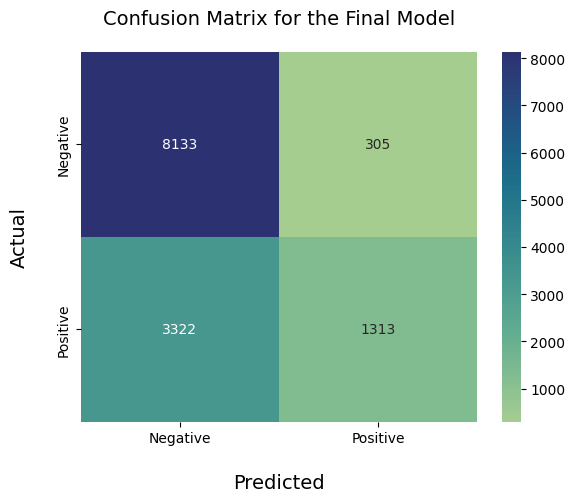

In [ ]:
import seaborn as sns
cm = confusion_matrix(target, output_new)
ax = sns.heatmap(cm, annot=True,fmt='d',cmap="crest")
# set x-axis label and ticks. 
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

# set y-axis label and ticks
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
# set plot title
ax.set_title("Confusion Matrix for the Final Model", fontsize=14, pad=20)

plt.show()

In [ ]:
((6140+2983)/13073)*100

69.78505316300773

In [ ]:
print(classification_report(target.detach().cpu().numpy(), output))

              precision    recall  f1-score   support

         0.0       0.79      0.73      0.76      8438
         1.0       0.56      0.64      0.60      4635

    accuracy                           0.70     13073
   macro avg       0.68      0.69      0.68     13073
weighted avg       0.71      0.70      0.70     13073



In [ ]:
def change_threshold(raw_output, thresholds):
    for index, x in enumerate(raw_output):
        if x >= thresholds:
            raw_output[index] = 1
        else:
            raw_output[index] = 0
    return raw_output

In [ ]:
varying_threshold_df = pd.DataFrame()
for ind, x in enumerate(threshold):
    
    for batchidx, (data,target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)
        target = target.detach().cpu().numpy()
        output = model2(data)
        output = output.detach().cpu().numpy()

    new_output = change_threshold(output,x)

    report = classification_report(target, new_output.flatten(), output_dict=True)

    to_add = pd.DataFrame({
    "Threshold":x,
    "0 Precision": report["0.0"]["precision"],
    "0 Recall": report["0.0"]["recall"],
    "0 F1": report["0.0"]["f1-score"],
    "1 Precision": report["1.0"]["precision"],
    "1 Recall": report["1.0"]["recall"],
    "1 F1": report["1.0"]["f1-score"],
    }, index = [ind])

    varying_threshold_df = pd.concat([varying_threshold_df, to_add], axis=0)


NameError: name 'classification_report' is not defined

Text(0.5, 1.0, 'Test Precision-Recall curve (NO ADR)')

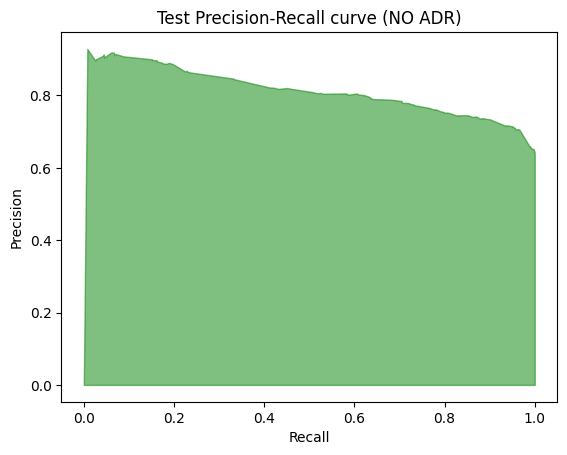

In [ ]:
plt.fill_between(varying_threshold_df['0 Recall'].values, varying_threshold_df['0 Precision'].values, alpha=0.5, color='g')
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title(f"Test Precision-Recall curve (NO ADR)")

Text(0.5, 1.0, 'Test Precision-Recall curve (Yes ADR)')

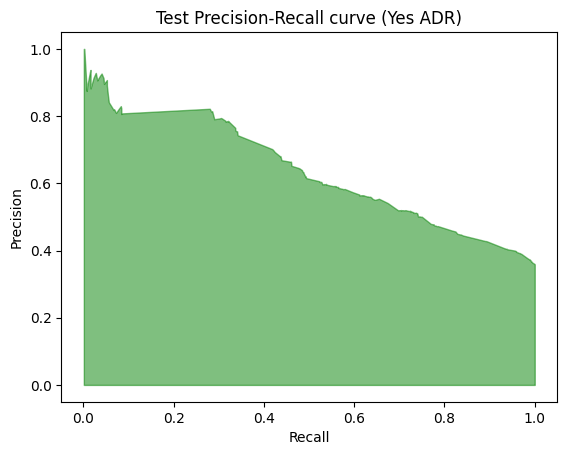

In [ ]:
plt.fill_between(varying_threshold_df['1 Recall'].values, varying_threshold_df['1 Precision'].values, alpha=0.5, color='g')
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title(f"Test Precision-Recall curve (Yes ADR)")

In [ ]:
varying_threshold_df.to_csv('varying_threshold.csv')

In [ ]:
to_add = pd.DataFrame({
    "0 Precision": report["0.0"]["precision"],
    "0 Recall": report["0.0"]["recall"],
    "0 F1": report["0.0"]["f1-score"],
    "1 Precision": report["1.0"]["precision"],
    "1 Recall": report["1.0"]["recall"],
    "1 F1": report["1.0"]["f1-score"],
}, index = [ind])

,0 Precision,0 Recall,0 F1,1 Precision,1 Recall,1 F1
1,0.773787,0.732697,0.752682,0.564202,0.617678,0.589731
